# Data Augmentation in CNN
Data Augmentation occurs ehen we create new data by doing modifications on our existing data. In this technique, we make reasonable modifications in the training set to create new augmented data.

## Rationale Behind data augmentation
There are two main reasons behind data aumentation in our project. The Caltech-256 dataset has a very limited number of images per class. Although there are 3 classes that have over 800 images, the other classes have on an average 100 images per class. Two work with such a small number of training data for almost all classes, a model may face two problems
    1. The model will have limited data to learn from
    2. The model will overfit to the existing data
As a consequence, the model will fail to be a robust learner. Data augmentation tries to alleviate the above problems by adding more images to the training set by doing reasonable modifications. The ```y-label``` i.e., the class remains unchanged. Only the pixel values are modified to do this aumentation.

## Impact of Data Augmentation
For a model that is trained on a very small sets of data, data aumentation plays a huge role to make the model learn fetures from the additional data that had been added to the training set. In that way, a model's filter become more robust to edge detection, orientations and other aspects that the unseen  data might have.

## Library and Techniques used in Data Augmentation
In out project, we will be using Keras's ```ImageDataGenerator``` class. We can define the modifications we want our images to have in the parameter of the constructor that creates an instance of the class. The techniques includes (but is not limited to):
    1. Flip (Horizontal/vertical)
    2. Rotate
    3. Zoom (in/out)
    4. Crop
    5. Vary coloers
We will be applying some of these techniques in our project. This notebook is a walk-through of how images are augmented to the dataset 

# The implementation
Import necessary libraries, of course the the ```ImageDataGenerator``` from Keras.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.
C:\Users\proti\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\proti\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\proti\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\proti\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

Here is a small routine function to show the images after augmentation

In [2]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

The variable ```gen``` is an instance of the class ```ImageDataGenerator```, in this we are defining which modifications are to be applied in the original image.

In [3]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
    height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

In [18]:
image_path = './056_0074.jpg'

In [19]:
image = np.expand_dims(plt.imread(image_path),0)

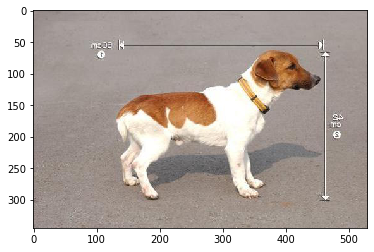

In [20]:
plt.imshow(image[0])

The ```flow()``` function generates a batches of augmented data. It takes input the data, and some other optional parameters.

In [21]:
#generate a batch of augmented images from this image
aug_iter = gen.flow(image)

In [22]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

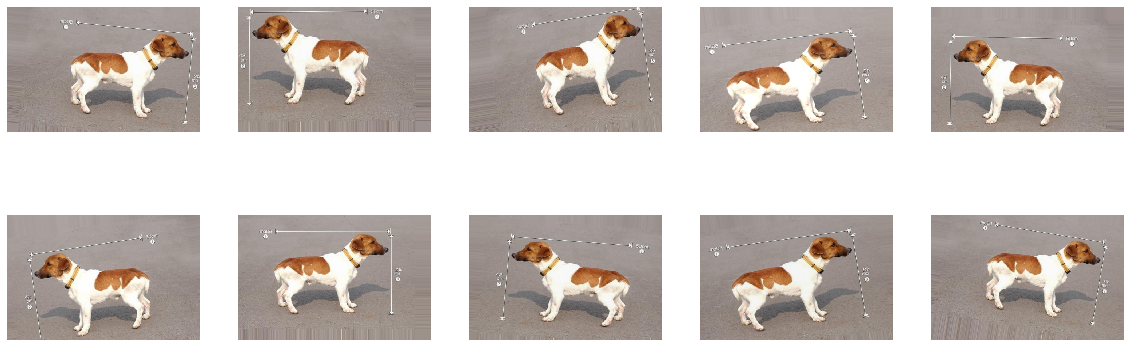

In [23]:
plots(aug_images, figsize=(20,7), rows=2)